In [69]:
#*******************
# Jacob van de Lindt
# 3/8/2024
# Description: notebook to help get comfortable with eqdsks
#*******************

import numpy as np
import matplotlib.pyplot as plt


# import functions from the getGfileDict.py file, should be in same directory level as this notebook 
import getGfileDict

In [19]:
# I have MANTA's example eqdsk saved as file 'ips-eqdsk.geq'. Use equilibrium_process helper functions to read the
# file and save in a dictunary 

eqdsk_file='ips-eqdsk.geq'  # the eqdsk file

 
eq0 = getGfileDict.getGfileDict('ips-eqdsk.geq')  # the equilibrium 


In [20]:
# print out all the keys in the eq0 dictunary 
print(f'The type of eq0 is: {type(eq0)}')
print('Its keys are: ')
print(eq0.keys())

The type of eq0 is: <class 'dict'>
Its keys are: 
dict_keys(['header', 'idum', 'mw', 'mh', 'xdim', 'zdim', 'rzero', 'rgrid1', 'zmid', 'rmaxis', 'zmaxis', 'ssimag', 'ssibdry', 'bcentr', 'cpasma', 'ssibry', 'rgrid', 'zgrid', 'psirz', 'psirzraw', 'fpol', 'pres', 'ffprim', 'pprime', 'qpsi', 'nbbbs', 'rbbbs', 'zbbbs', 'nlim', 'xlim', 'ylim', 'isPlasma', 'pressrz', 'qrz', 'btrz', 'brrz', 'bzrz', 'jtrz', 'npsimid', 'gammamid', 'bzmid', 'btmid', 'jtmid', 'pressmid', 'qmid'])


On-axis magnetic field: 11.08 T
On-axis major radius: 4.73740835 m


Text(0, 0.5, 'Z [m]')

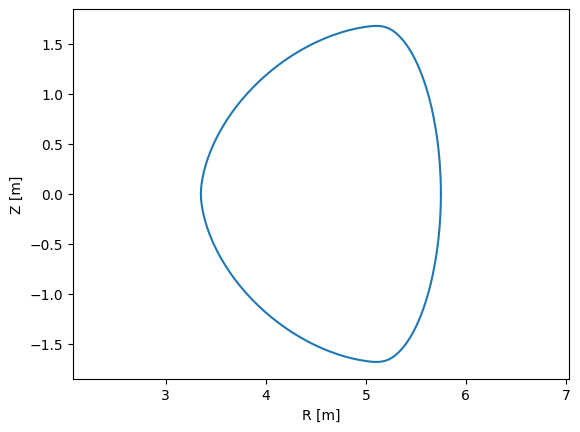

In [27]:
# now lets try to recreate a plot like the default that pops out. 

# first print some usful info:
B0 = eq0['bcentr']
R0 = eq0['rmaxis']
print(f'On-axis magnetic field: {B0} T')
print(f'On-axis major radius: {R0} m')

# now lets grab the last closed flux surface and plot it 
R_LCFS = eq0['rbbbs']  # R coords of the last closed flux surface
Z_LCFS = eq0['zbbbs']  # Z coords of the last closed flux surface
plt.axis('equal')
plt.plot(R_LCFS, Z_LCFS)
plt.xlabel('R [m]')
plt.ylabel('Z [m]')


Text(0, 0.5, 'Z [m]')

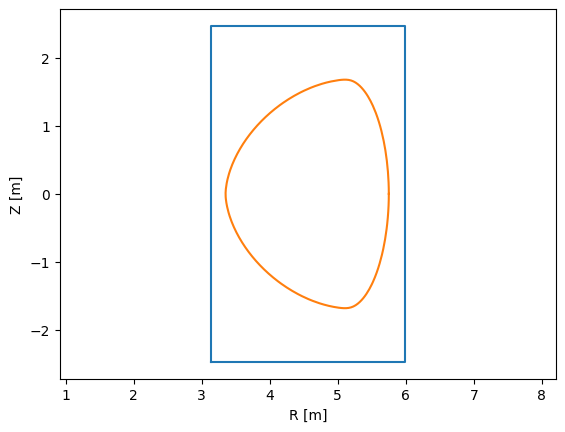

In [28]:
# Now add the limiter. Note we didn't make one so this is just a box. Not super important 
R_LIM = eq0['xlim']  # R coords of the first wall
Z_LIM = eq0['ylim']  # Z coords of the first wall 
plt.plot(R_LIM, Z_LIM)
plt.axis('equal')
plt.plot(R_LCFS, Z_LCFS)
plt.xlabel('R [m]')
plt.ylabel('Z [m]')


In [57]:
# Now lets plot a bunch of flux surfaces. Grab the R, Z, coords and the R x Z gris of psi values 
R = eq0["rgrid"]
Z = eq0["zgrid"]
psirz = eq0["psirz"]
print(R.shape)
print(Z.shape)
print(psirz.shape)

# in order to normalize to the last close flux surface value, pull the flux value at the axis and at the last closed flux surface
psi_mag_axis = eq0["ssimag"]
psi_boundary = eq0["ssibdry"]

# normalize the psirz mesh so that the norm is 1 on boundary and zero on axis 
psirzNorm = (psirz - psi_mag_axis)/(psi_boundary-psi_mag_axis) 

# create 2D interpolation to create a contour plot from 
from scipy.interpolate import interp2d
rInterp = np.linspace(np.min(R), np.max(R), 200)
zInterp = np.linspace(np.min(Z), np.max(Z), 200)
psirzNormInterp = interp2d(R,Z, psirzNorm, kind = 'cubic')(rInterp, zInterp)

# now we are all set to supply our grid to the psirzNormInterp function and spit out the flux value. 


(129,)
(129,)
(129, 129)


C:\Users\jacob\AppData\Local\Temp\ipykernel_20760\912550943.py:20: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  psirzNormInterp = interp2d(R,Z, psirzNorm, kind = 'cubic')(rInterp, zInterp)
C:\Users\jacob\AppData\Local\Temp\ipykernel_20760\912550943.py:20: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplr

Text(0, 0.5, 'Z [m]')

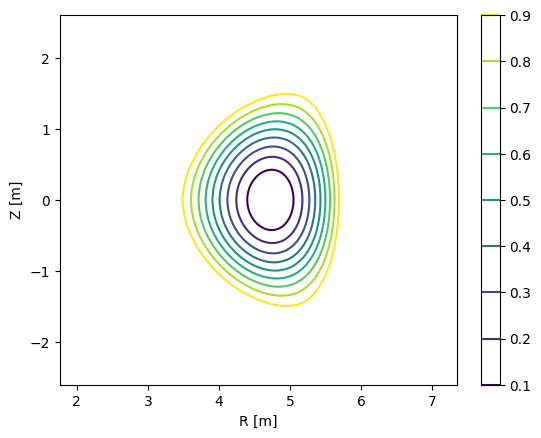

In [67]:
# Manually enter the normalized flux contours you want to see 
psinorms_to_plot = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

# plot our normalized flux surfaces 
Rmesh, Zmesh = np.meshgrid(rInterp, zInterp)

plt.axis('equal')
plt.contour(Rmesh, Zmesh, psirzNormInterp, levels=psinorms_to_plot)
plt.colorbar()
plt.xlabel('R [m]')
plt.ylabel('Z [m]')

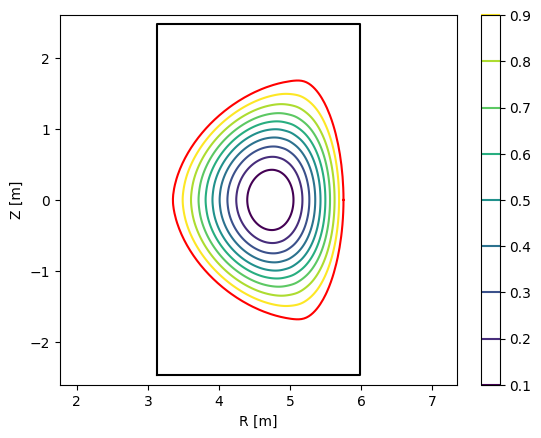

In [68]:
# now lets add in the last closed flux surface in red and the limiter in black
plt.axis('equal')
plt.contour(Rmesh, Zmesh, psirzNormInterp, levels=psinorms_to_plot)
plt.colorbar()
plt.xlabel('R [m]')
plt.ylabel('Z [m]')
plt.plot(R_LIM, Z_LIM, color='k')
plt.axis('equal')
plt.plot(R_LCFS, Z_LCFS, color='red')

<a list of 100 PathCollection objects>


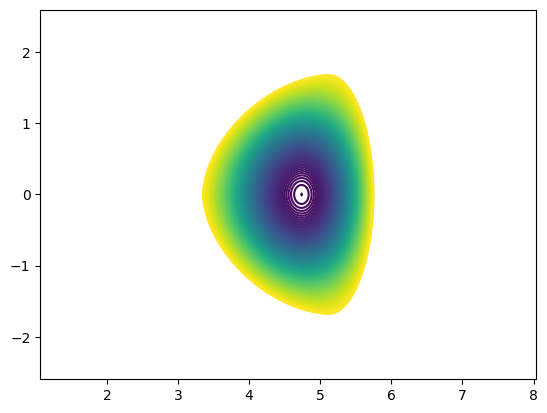

In [82]:
# now lets get the volume elements between all the flux surfaces above, revolved around the torour of course! 
psinorms_for_dvol = np.linspace(0.0001, 1, 100)  # get 100 surfaces for good volume elements

# The corrisponding rho_tor array for the density and temp profiles is defined as 
rho_tor = np.sqrt(psinorms_for_dvol)


cs = plt.contour(Rmesh, Zmesh, psirzNormInterp, levels=psinorms_for_dvol)
plt.axis('equal')
# the collections contains the 9 contours we made with the levels argument 
print(cs.collections)


for item in cs.collections:
   for i in item.get_paths():
      v = i.vertices
      x = v[:, 0]
      y = v[:, 1]





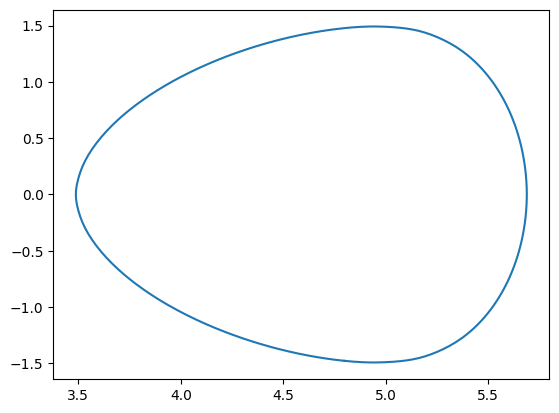